# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [16]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers_scaled_balanced.pkl")
print(df.shape)
df.head()

(1939, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.00000,-0.944950,1.000000,1.333333,0.000000,-1.0,-0.083333,-0.5,0.415932,-0.5,0.0,1.507414,-0.333333,-0.500000,-1.0,-0.944444,3.0,-0.666667,-0.5,-0.6,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.00000,0.000000,1.041064,-0.333333,0.108443,0.0,0.250000,-1.0,0.415932,-0.5,1.0,-0.131846,-0.666667,1.500000,0.0,-0.388889,0.0,0.000000,0.0,0.2,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.94286,0.000000,5.255676,-0.250000,0.108443,0.0,0.833333,0.5,-6.615635,1.0,0.0,2.648120,-0.333333,0.166667,2.0,-0.500000,-1.0,0.000000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.05714,-0.944950,0.000000,0.250000,-0.069419,0.0,-0.416667,1.0,0.415932,0.5,0.0,0.626911,0.333333,-0.500000,2.0,0.388889,2.0,0.500000,3.0,0.4,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.05714,1.238725,0.000000,-0.250000,0.000000,0.0,0.250000,-1.0,0.000000,-0.5,1.0,-0.471010,0.666667,-0.333333,1.0,-0.055556,-1.0,0.166667,-0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [18]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

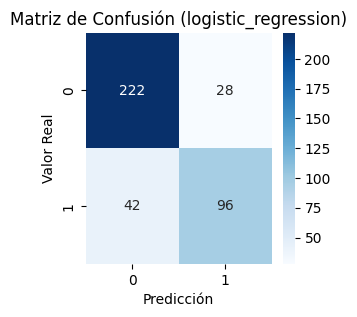

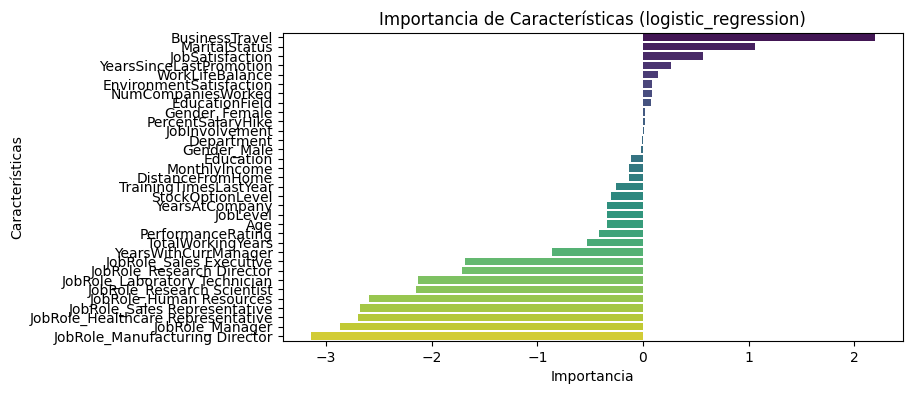

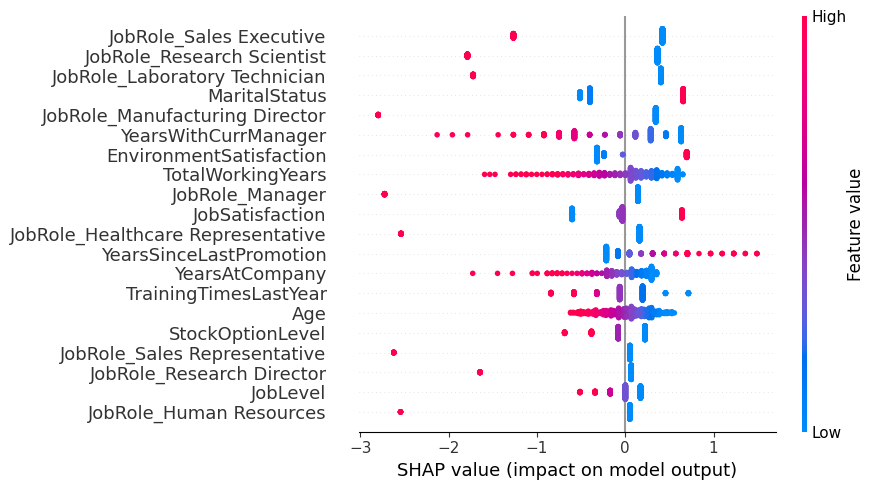

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,0.008002,NaN,NaN,NaN,regresion logistica
test,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,NaN,NaN,0.008002,NaN,regresion logistica


In [4]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_split=10)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,0.009524,16.0,NaN,NaN
test,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,NaN,NaN,0.009524,16.0


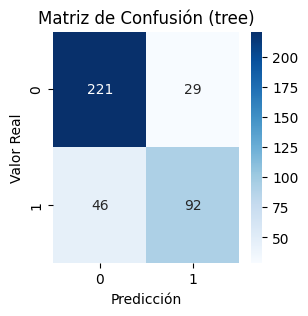

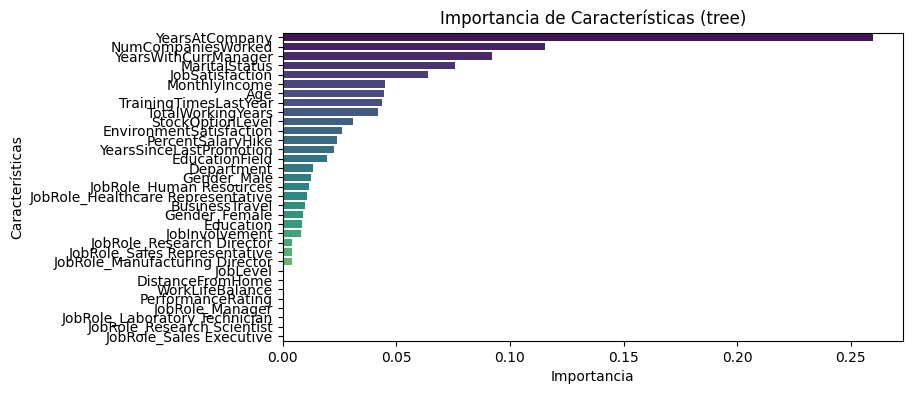

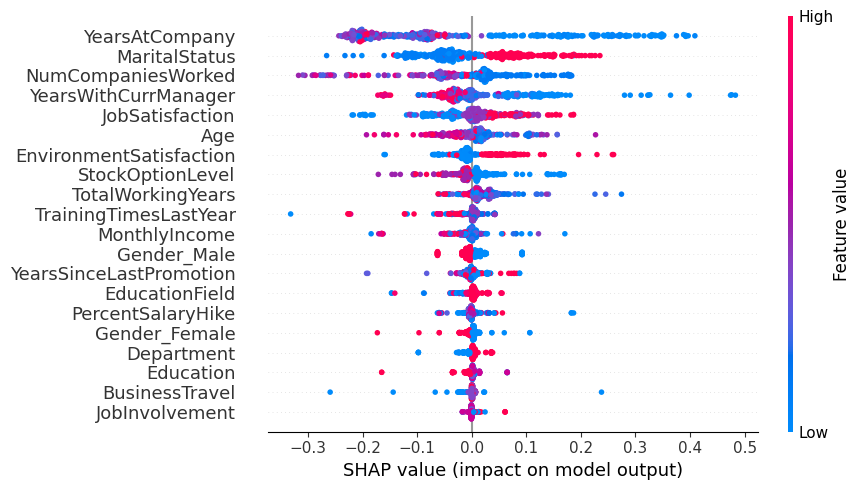

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,0.009524,16.0,NaN,NaN,decision tree
test,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,NaN,NaN,0.009524,16.0,decision tree
train,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,0.008002,NaN,NaN,NaN,regresion logistica
test,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,NaN,NaN,0.008002,NaN,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860667,-1.0,NaN,NaN
test,0.886598,0.889711,0.886598,0.883504,0.741678,0.925739,NaN,NaN,0.860667,-1.0


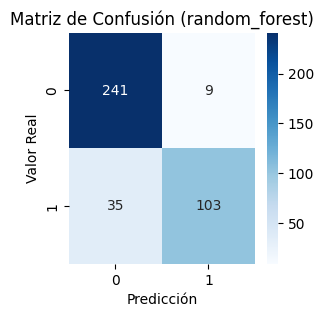

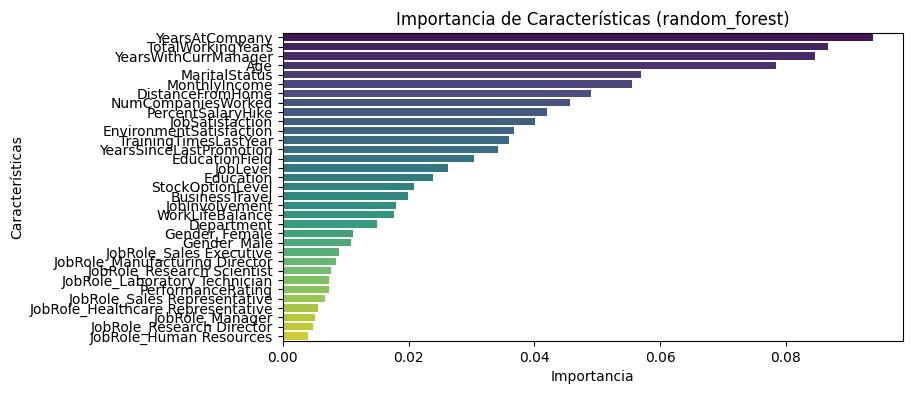

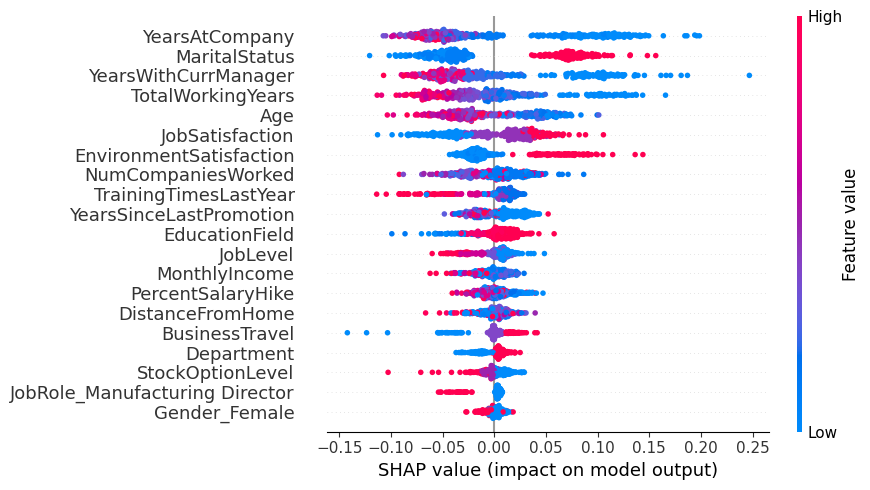

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860667,-1.0,NaN,NaN,random forest
test,0.886598,0.889711,0.886598,0.883504,0.741678,0.925739,NaN,NaN,0.860667,-1.0,random forest
train,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,0.009524,16.0,NaN,NaN,decision tree
test,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,NaN,NaN,0.009524,16.0,decision tree
train,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,0.008002,NaN,NaN,NaN,regresion logistica
test,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,NaN,NaN,0.008002,NaN,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **XGBoost**

In [7]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.129269,NaN,NaN,NaN,xgboost
test,0.884021,0.883267,0.884021,0.882862,0.742356,0.938783,NaN,NaN,0.129269,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860667,-1.0,NaN,NaN,random forest
test,0.886598,0.889711,0.886598,0.883504,0.741678,0.925739,NaN,NaN,0.860667,-1.0,random forest
train,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,0.009524,16.0,NaN,NaN,decision tree
test,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,NaN,NaN,0.009524,16.0,decision tree
train,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,0.008002,NaN,NaN,NaN,regresion logistica
test,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,NaN,NaN,0.008002,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

### **Gradient Boosting**

In [8]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           n_estimators=200, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050615,16.0,NaN,NaN,gradient boosting
test,0.909794,0.911417,0.909794,0.908111,0.796925,0.944928,NaN,NaN,0.050615,16.0,gradient boosting
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.129269,NaN,NaN,NaN,xgboost
test,0.884021,0.883267,0.884021,0.882862,0.742356,0.938783,NaN,NaN,0.129269,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860667,-1.0,NaN,NaN,random forest
test,0.886598,0.889711,0.886598,0.883504,0.741678,0.925739,NaN,NaN,0.860667,-1.0,random forest
train,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,0.009524,16.0,NaN,NaN,decision tree
test,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,NaN,NaN,0.009524,16.0,decision tree
train,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,0.008002,NaN,NaN,NaN,regresion logistica
test,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,NaN,NaN,0.008002,NaN,regresion logistica


## **Resumen:**

In [9]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.drop(columns=['time_seconds',
       'n_jobs', 'tiempo_computacion(segundos)', 'nucleos_usados'], inplace=True)
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
1,0.909794,0.911417,0.909794,0.908111,0.796925,0.944928,gradient boosting
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
3,0.884021,0.883267,0.884021,0.882862,0.742356,0.938783,xgboost
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
5,0.886598,0.889711,0.886598,0.883504,0.741678,0.925739,random forest
6,0.877498,0.877322,0.877498,0.876174,0.735074,0.934635,decision tree
7,0.806701,0.803749,0.806701,0.803535,0.566293,0.799957,decision tree
8,0.831077,0.830172,0.831077,0.828461,0.632214,0.895104,regresion logistica
9,0.819588,0.817180,0.819588,0.817224,0.597224,0.890174,regresion logistica


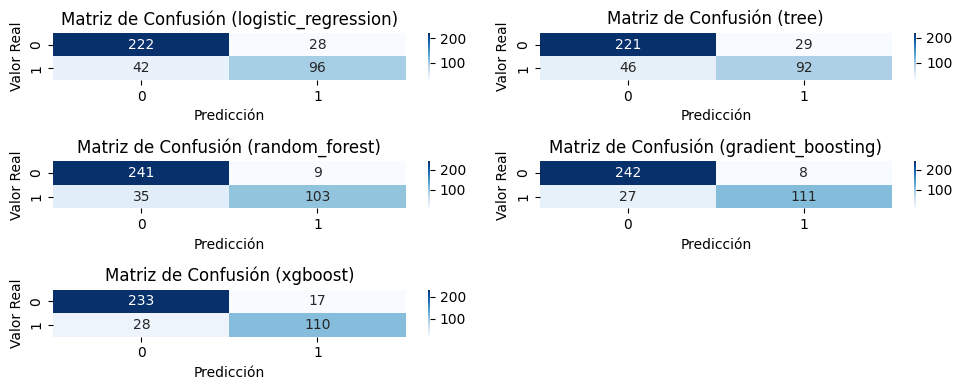

In [10]:
modelo_clasificacion.plot_all_matriz_confusion()

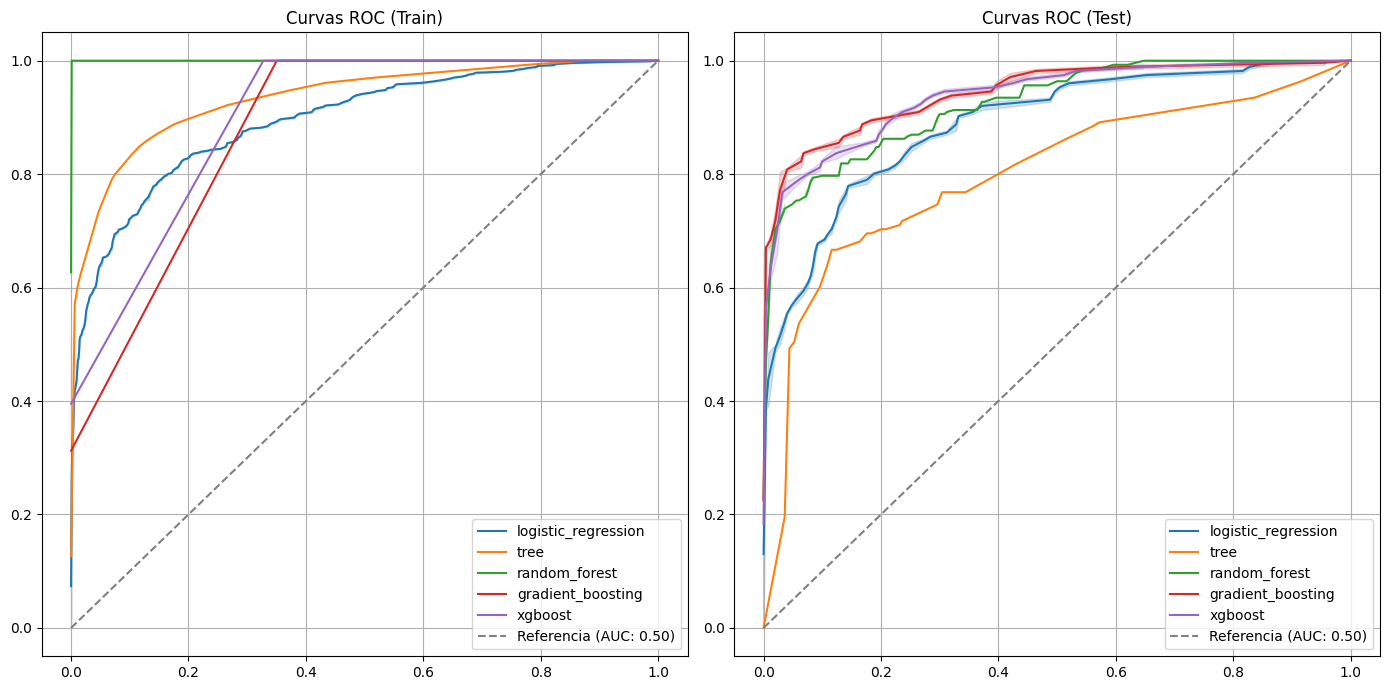

In [11]:
modelo_clasificacion.plot_curvas_roc_train_test()

La mejor métrca obtenida es el gradient boosting, hemos conseguido alcanzar una kappa en el test de 0.79 y unas métricas de todas unos 0.9. Además, si observamos las matrices de confusión del test podemos ver que es la que tiene menos falsos positivos y falsos negativo, siendo también la métrica que nos da el recall más alto que es el cual más nos interesa en comparación con la precisión pues lo que queremos es minimizar los falsos negativos. Vamos a ver si ajustando los parámetros podemos obtener una métrica mejor.

### Reajuste de parámetros:

In [12]:
# XGBoost

params = {'n_estimators': [100, 200, 250],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

modelo_clasificacion.ajustar_modelo("xgboost", param_grid=params)
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_xgboost

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.027004,NaN,NaN,NaN,xgboost
test,0.896907,0.897675,0.896907,0.895102,0.768303,0.943884,NaN,NaN,0.027004,NaN,xgboost


Seguimos teniendo mejores metricas para el XGBoost, por último vamos a intentarlo con el Gradient:

In [19]:
# Gradiente Boosting
params_gradient={
                'n_estimators': [150, 200, 225],
                'learning_rate': [0.1, 0.2, 0.3],
                'max_depth': [4, 5, 6, 7],
                'min_samples_split': [2, 4, 5, 7, 10],
                'min_samples_leaf': [2, 3, 4, 5],
                'subsample': [0.8, 1.0]
            }

modelo_clasificacion.ajustar_modelo("gradient_boosting", param_grid=params_gradient)
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=3,
                           min_samples_split=7, n_estimators=200,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test,0.886598,0.886517,0.886598,0.884867,0.745983,0.943507


Hemos conseguido mejorar el xgboost pero no el gradient, aun así sigue siendo mejor el gradient boosting original.